In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

In [ ]:
data = pd.read_csv("/content/data.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print(data.isnull().sum())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label']=le.fit_transform(data['label'])

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
X = data.drop('label',axis=1)
y = data['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from operator import ne
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model.predict(X_test)
print("Accuracy =",accuracy_score(y_test,y_pred))
print("\n Classification report =",classification_report(y_test,y_pred,target_names=le.classes_))

Accuracy = 0.9931818181818182

 Classification report =               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00  

In [ ]:
sample=np.array([[90, 40, 40, 25, 80, 6.5, 200]])
feature_names = X_train.columns
sample_df = pd.DataFrame(sample, columns=feature_names)
prediction = model.predict(sample_df)
print("Recommended Crop = ",le.inverse_transform(prediction)[0])

Recommended Crop =  rice


<ipython-input-17-f0b11bbce019>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='coolwarm')


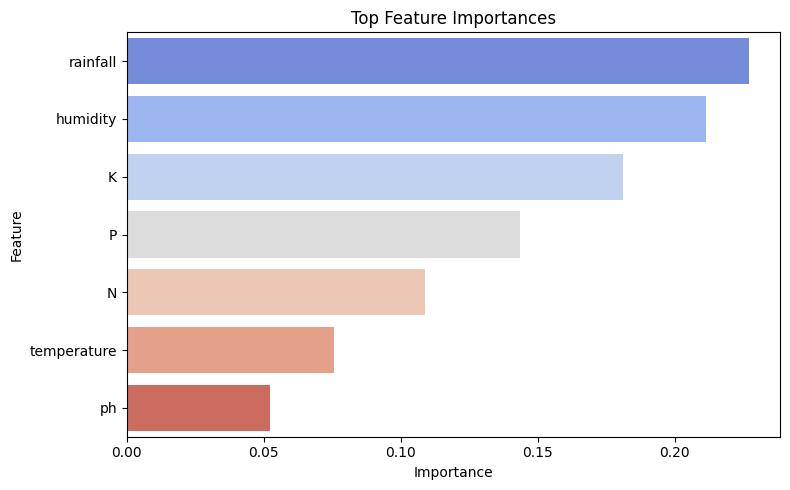

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame and sort
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Efficient, clean plot
plt.figure(figsize=(8, 5))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='coolwarm')
plt.title('Top Feature Importances')
plt.tight_layout()
plt.show()


<ipython-input-18-0fa306c6350c>:28: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


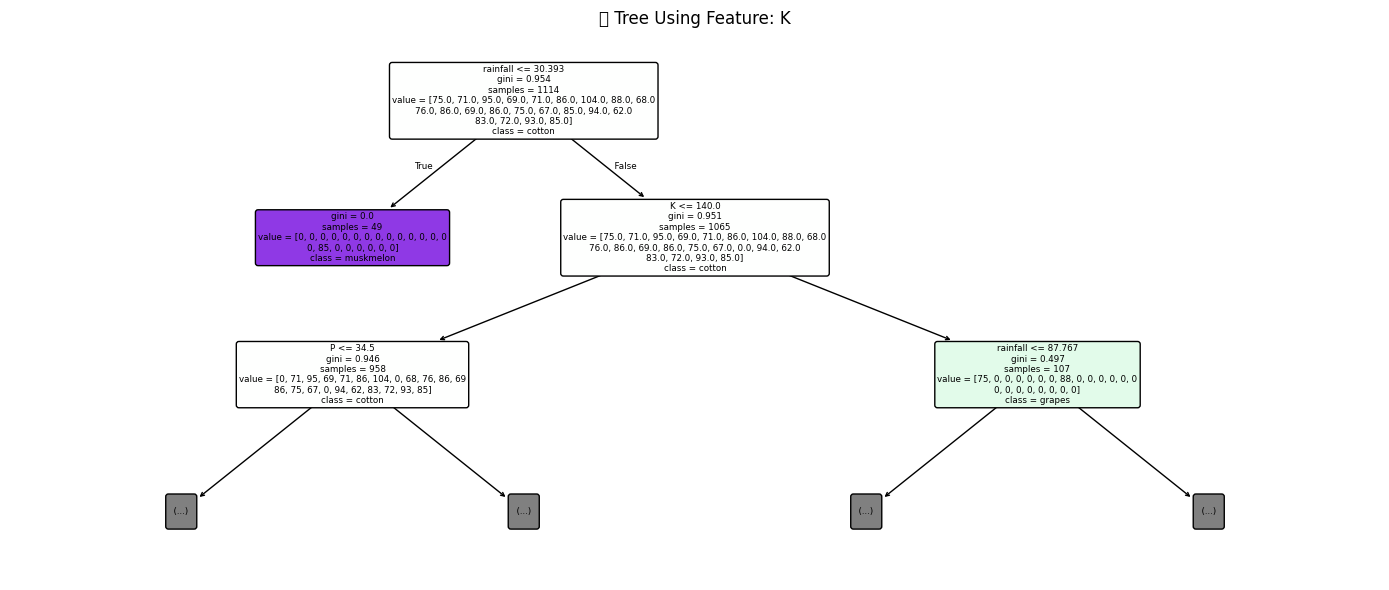

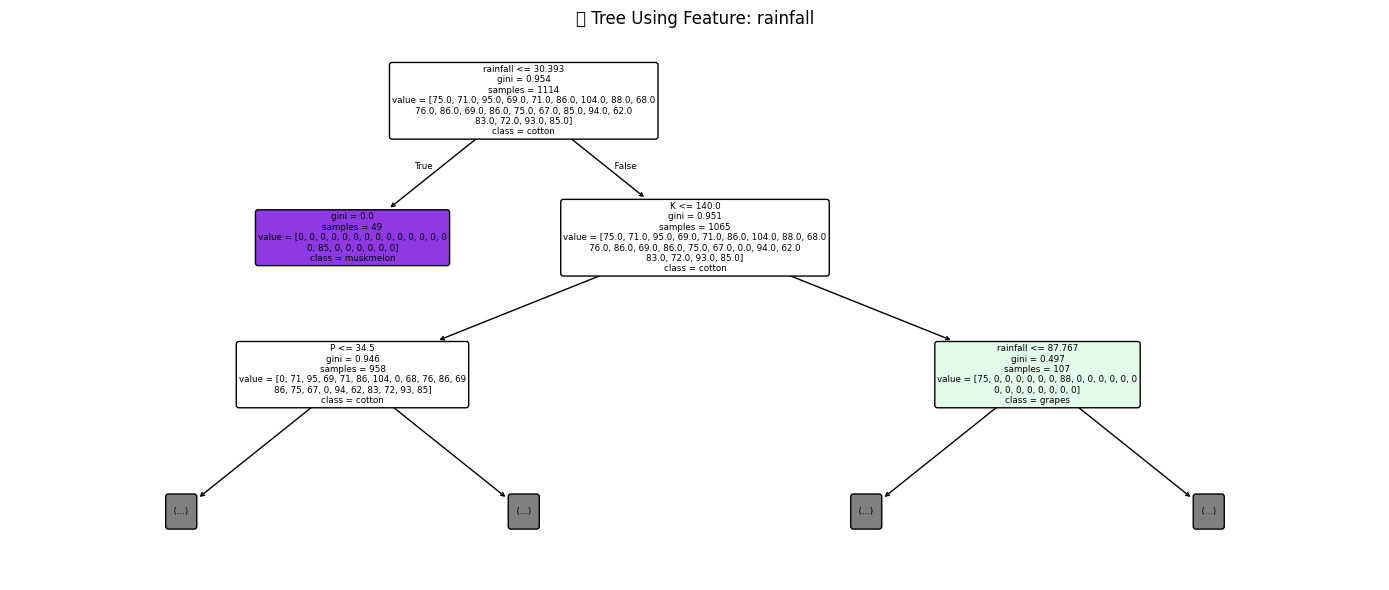

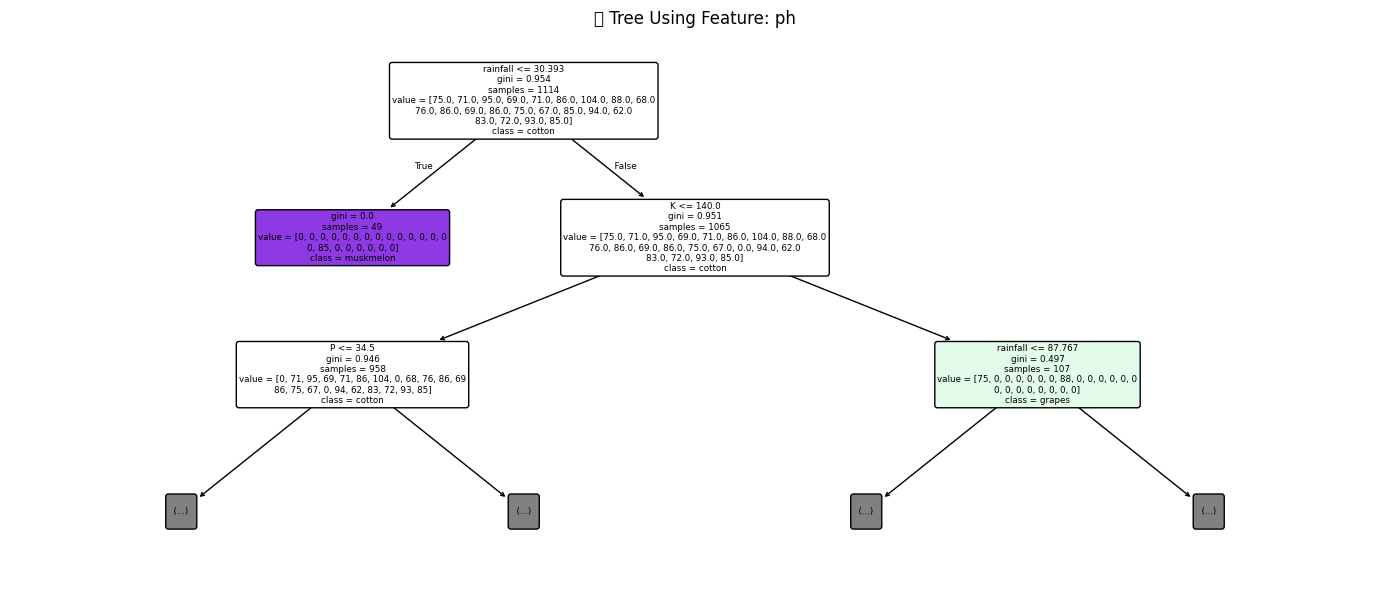

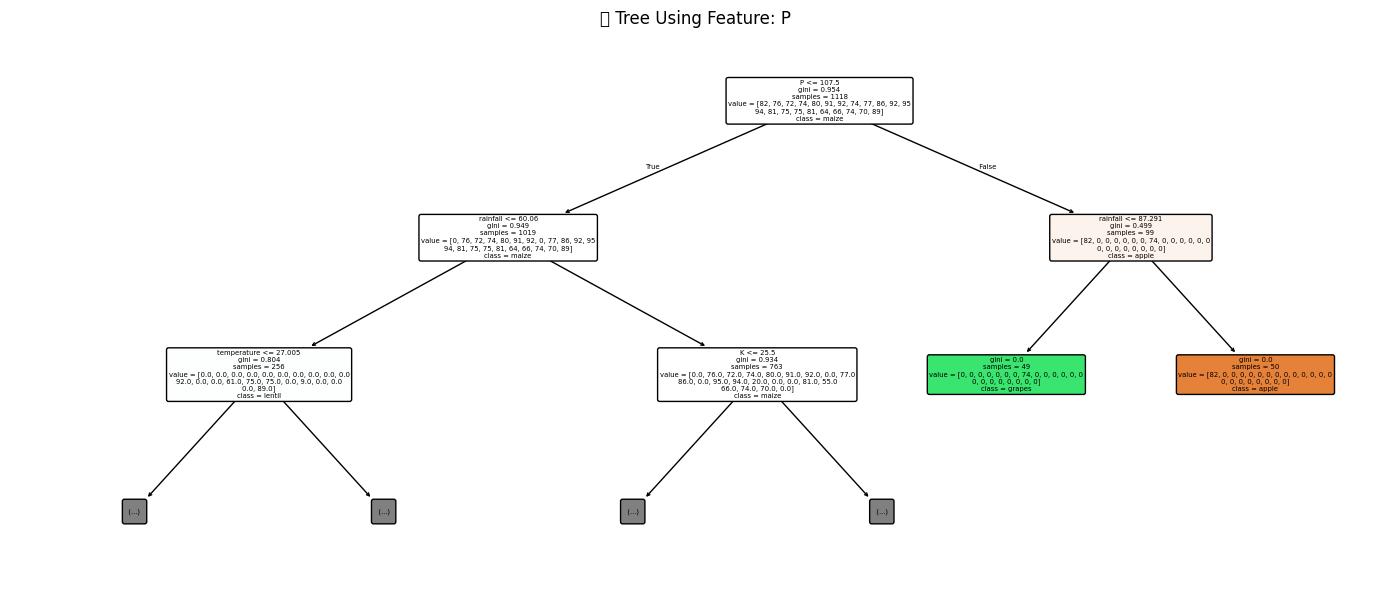

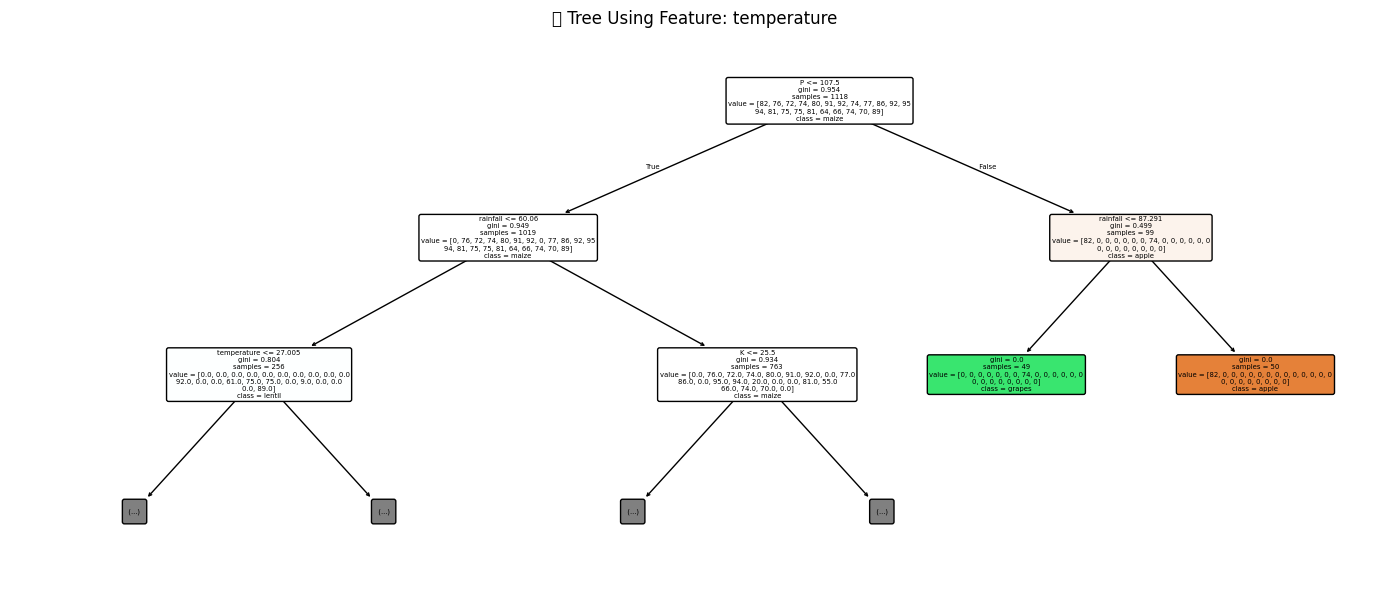

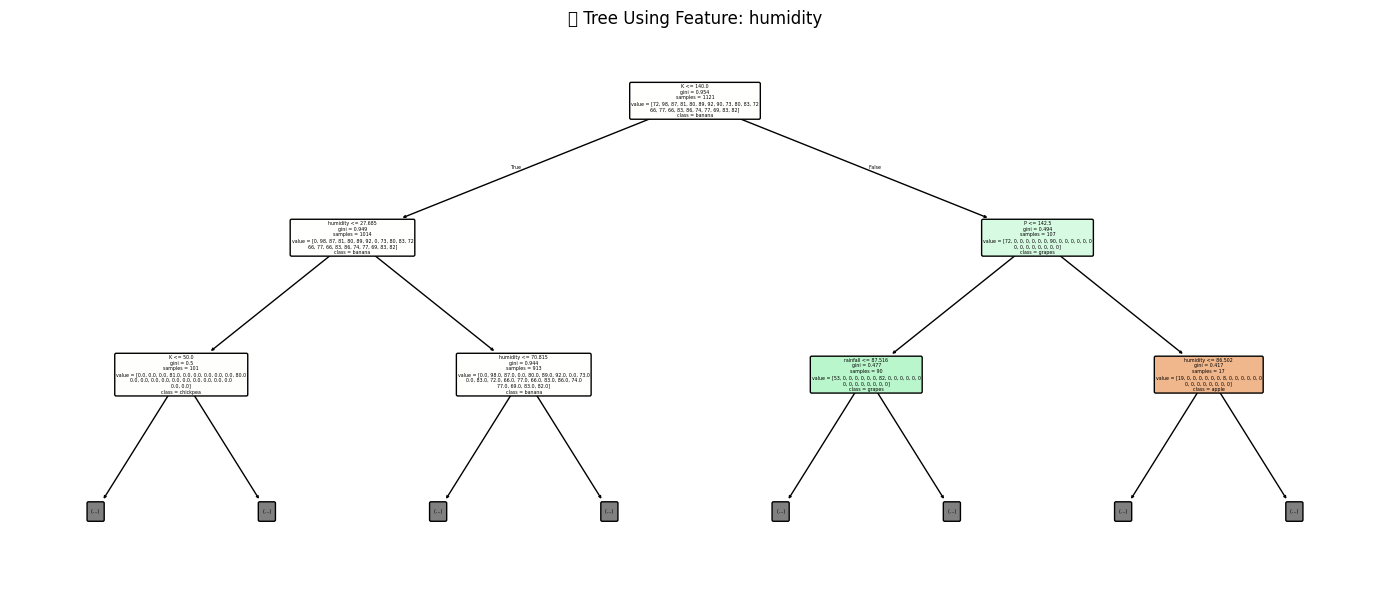

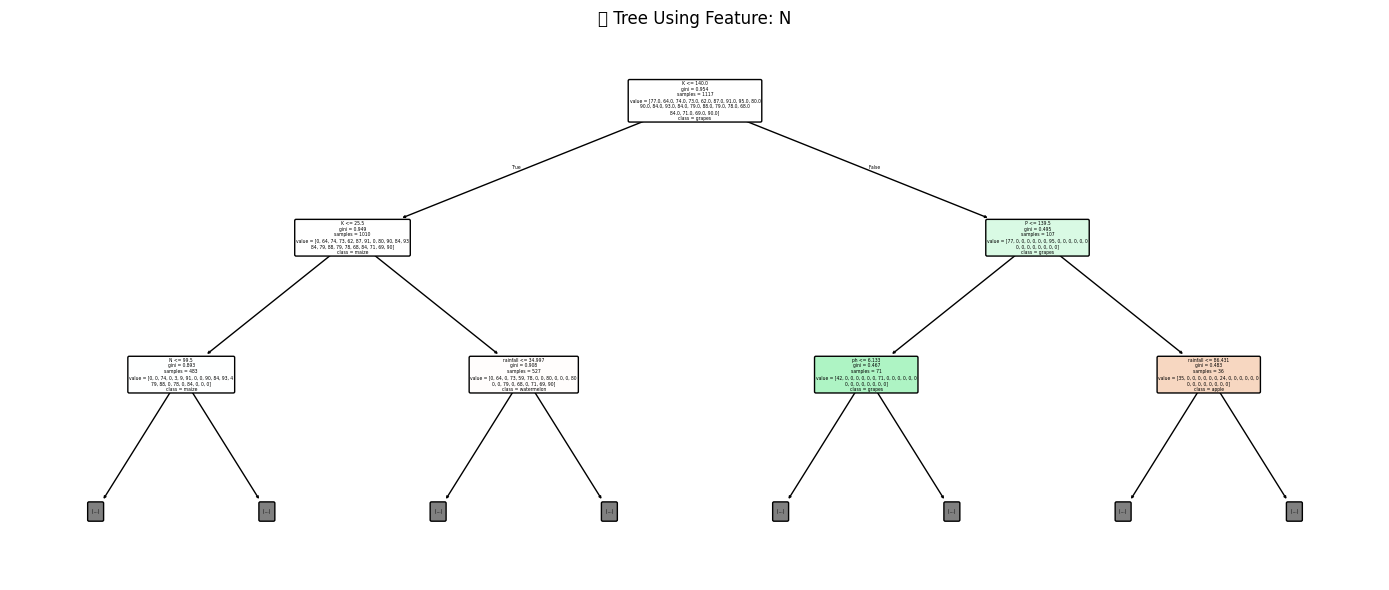

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

used_features = set()  # Keep track of already visualized features
feature_names = list(X.columns)

# Loop through trees in the forest
for estimator in model.estimators_:
    # Get the features used by this tree
    tree_features = estimator.tree_.feature

    # Count which features are used in top 3 splits
    top_features = set(tree_features[:3])

    for f_index in top_features:
        feature = feature_names[f_index]

        if feature not in used_features:
            # Plot this tree
            plt.figure(figsize=(14, 6))
            plot_tree(estimator,
                      feature_names=feature_names,
                      class_names=le.classes_,
                      max_depth=2,   # Shallow for speed and clarity
                      filled=True,
                      rounded=True)
            plt.title(f'🌳 Tree Using Feature: {feature}')
            plt.tight_layout()
            plt.show()

            used_features.add(feature)

        if len(used_features) == len(feature_names):
            break
    if len(used_features) == len(feature_names):
        break


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'crop_recommendation_model.pkl')

# Save the label encoder too (important for decoding predictions)
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']